In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp

%matplotlib inline

(a) Join the Digit Recognizer competition on Kaggle. Download the training and test data. The
competition page describes how these files are formatted.

In [2]:
test = pd.read_csv('all/test.csv')
train = pd.read_csv('all/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(b) Write a function to display an MNIST digit. Display one of each digit

In [3]:
digit_index_dict ={'zero':1,
                   'one':2,
                   'two':16,
                   'three':7,
                   'four':3,
                   'five':8,
                   'six':21,
                   'seven':6,
                   'eight':10,
                   'nine':11,
                   }
for digit in digit_index_dict.keys():
    i = digit_index_dict[digit]
    pixels = train.iloc[i,1:].values
    pixels = np.reshape(pixels,(28,28))
    img = smp.toimage( pixels )       # Create a PIL image
    img.save("1b_images/" + digit + ".jpg", "JPEG")

(c) Examine the prior probability of the classes in the training data. Is it uniform across the
digits? Display a normalized histogram of digit counts. Is it even?

In [135]:
classes = train['label']
classes.value_counts() / len(classes)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

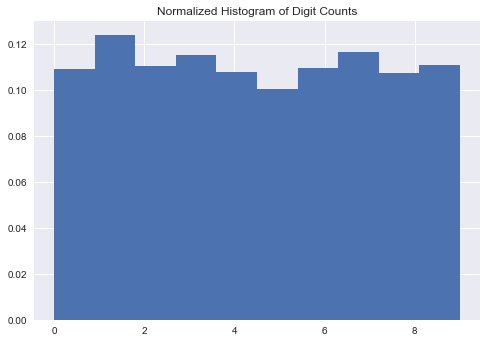

In [164]:
plt.hist(classes, bins = 10, normed=1)
plt.title('Normalized Histogram of Digit Counts')

(d) Pick one example of each digit from your training data. Then, for each sample digit, compute
and show the best match (nearest neighbor) between your chosen sample and the rest of
the training data. Use L2 distance between the two images’ pixel values as the metric. This
probably won’t be perfect, so add an asterisk next to the erroneous examples (if any).

In [5]:
from scipy.spatial.distance import cdist

digit_index_dict ={'zero':1,
                   'one':2,
                   'two':16,
                   'three':7,
                   'four':3,
                   'five':8,
                   'six':21,
                   'seven':6,
                   'eight':10,
                   'nine':11,
                   }

for digit in digit_index_dict.keys():

    digit_index = digit_index_dict[digit]

    pixels_original = train.iloc[digit_index,1:].values.reshape((1,784))
    rest_pixels = train.drop(digit_index).iloc[:,1:]
    rest_labels = train.drop(digit_index)['label']

    distances = cdist(pixels_original,rest_pixels, 'euclidean')

    min_index = np.argmin(distances)
    if min_index > digit_index:
        min_index +=1



    pixels_original = np.reshape(pixels_original,(28,28))
    img_original = smp.toimage( pixels_original )       
    img_original.save("1d_images/" + digit + "_" + str(digit_index) + ".jpg", "JPEG")

    pixels_neighbor = np.reshape(train.iloc[min_index,1:].values,(28,28))
    img_neighbor = smp.toimage(pixels_neighbor)       
    img_neighbor.save("1d_images/" + digit + "_neighbor_" + str(min_index) + ".jpg", "JPEG")

(e) Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other
digits, compute the pairwise distances for all genuine matches and all impostor matches,
again using the L2 norm. Plot histograms of the genuine and impostor distances on the same
set of axes.

In [6]:
from scipy.spatial.distance import cdist

zeros_df = train.loc[train['label'] == 0,:]
ones_df = train.loc[train['label'] == 1,:]

genuine_zeros = cdist(zeros_df.drop('label', axis = 1), zeros_df.drop('label', axis = 1), 'euclidean')
genuine_ones = cdist(ones_df.drop('label', axis = 1), ones_df.drop('label', axis = 1), 'euclidean')
imposters = cdist(ones_df.drop('label', axis = 1), zeros_df.drop('label', axis = 1), 'euclidean')

gl0 = np.triu(genuine_zeros).reshape(1,genuine_zeros.shape[0]*genuine_zeros.shape[0])
gl0 = gl0[gl0 != 0]
gl1 = np.triu(genuine_ones).reshape(1,genuine_ones.shape[0]*genuine_ones.shape[0])
gl1 = gl1[gl1 != 0]
gen_list = np.concatenate((gl0,gl1))
imp_list = imposters.reshape(1,imposters.shape[0]*imposters.shape[1])

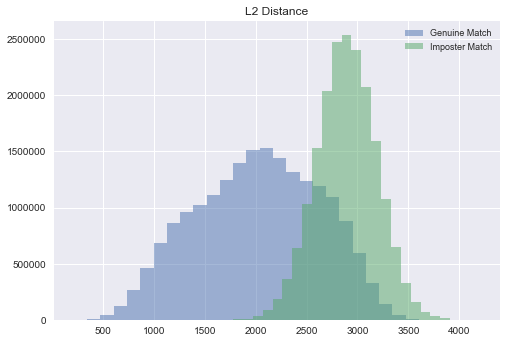

In [132]:
plt.hist(gen_list.tolist(),bins = 30,label='Genuine Match', alpha = .5)
plt.hist(imp_list.tolist(),bins = 30,label='Imposter Match', alpha = .5)
plt.legend(loc='upper right', prop={'size': 9})
plt.title("L2 Distance")
plt.show()

(f ) Generate an ROC curve from the above sets of distances. What is the equal error rate? What
is the error rate of a classifier that simply guesses randomly?

0.182203034284


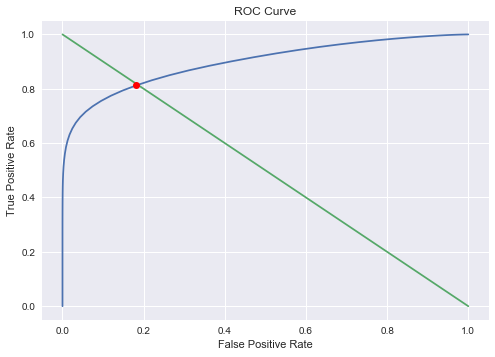

In [165]:
num_genuine = float(gen_list.shape[0])
num_imposter = float(imp_list.shape[1])
thresholds = np.linspace(np.min(gen_list), np.max(imp_list), 100)
true_positive_rates = []
false_positive_rates = []
for t in thresholds:
    true_positive_rates.append(gen_list[gen_list < t].shape[0] / num_genuine)
    false_positive_rates.append(imp_list[imp_list < t].shape[0] / num_imposter)

plt.plot(false_positive_rates, true_positive_rates)
plt.plot(false_positive_rates,-1*np.array(false_positive_rates)+1)
eer = np.argwhere(np.diff(np.sign(true_positive_rates - (-1*np.array(false_positive_rates)+1)))).flatten()[0]
plt.plot(false_positive_rates[eer], true_positive_rates[eer], 'ro')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print false_positive_rates[eer]

(g) Implement a K-NN classifier. (You cannot use external libraries for this question; it should
be your own implementation.)

In [92]:
def KNN(X_test, X_train, y_train, k = 5):
    distances = cdist(X_test,X_train, 'euclidean')
    k_min_ids = np.apply_along_axis(np.argpartition, 1, distances,k)
    predictions = []
    for i in range(0,k_min_ids.shape[0]):
        neighbor_ids = k_min_ids[i][0:k]
        neighbor_vals = y_train.iloc[neighbor_ids]
        predicted_val = neighbor_vals.mode().values[0]
        predictions.append(predicted_val)
    return predictions

(h) Randomly split the training data into two halves. Train your k-NN classifier on the first half
of the data, and test it on the second half, reporting your average accuracy.

In [95]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train,test_size = .5, random_state = 5)
y_train = train_df['label']
X_train = train_df.iloc[:,1:]
y_test = test_df['label']
X_test = test_df.iloc[:,1:]

predicted_vals = KNN(X_test,X_train,y_train, k = 5)
print "Avg accuracy: " + str((predicted_vals == y_test).mean())


Avg accuracy: 0.960619047619


(i) Generate a confusion matrix (of size 10 × 10) from your results. Which digits are particularly
tricky to classify?

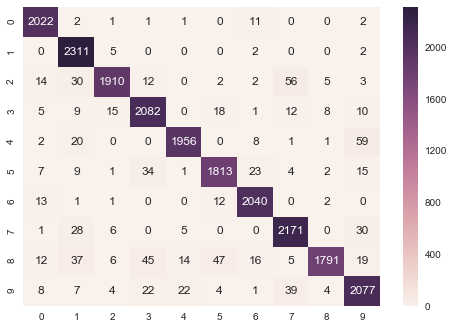

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_data = confusion_matrix(y_test, predicted_vals, labels=range(0,10), sample_weight=None)
ax = sns.heatmap(cm_data, annot=True,fmt="d")

(j) Train your classifier with all of the training data, and test your classifier with the test data.
Submit your results to Kaggle.

In [129]:
y_train = train['label']
X_train = train.iloc[:,1:]
X_test = test
test_id = test.index + 1
kaggle_test_predictions = KNN(X_test,X_train,y_train, k = 5)
pred_df = pd.DataFrame({'ImageId':test_id,'Label':kaggle_test_predictions})
pred_df.to_csv('hw_q1_submission.csv',index=False)